# Determinantes de la oferta monetaria en la econom√≠a peruana (2010‚Äì2025)

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan, normal_ad

# 1. Planteamiento del problema

**Pregunta de investigaci√≥n:**

¬øC√≥mo influyen la inflaci√≥n, la tasa de referencia del BCRP y las reservas internacionales netas (RIN) en la evoluci√≥n de la oferta monetaria (liquidez total) en el Per√∫ durante el per√≠odo 2022‚Äì2025 con datos mensuales?

**Hip√≥tesis te√≥rica:**

* Una mayor inflaci√≥n afecta positivamente la oferta monetaria, ya que presiona al banco central a incrementar la emisi√≥n de dinero para sostener la liquidez de la econom√≠a.

* Una mayor tasa de referencia afecta negativamente la oferta monetaria, pues encarece el cr√©dito y restringe la creaci√≥n secundaria de dinero.

* Un mayor nivel de reservas internacionales netas (RIN) afecta positivamente la oferta monetaria, ya que proporcionan respaldo para la emisi√≥n y facilitan la expansi√≥n de liquidez cuando el BCRP interviene en el mercado cambiario.



# 2. Selecci√≥n del modelo econom√©trico

$$
\ln(\text{Liquidez}_t) = \beta_0 + \beta_1 \ln(\text{Inflacion}_t) + \beta_2 \text{TasaRef}_t + \beta_3 \ln(\text{RIN}_t) + u_t
$$


# 3. Recolecci√≥n de datos (BCRP):

*  PN00193MM: Liquidez Total
*  PN01276PM: Inflacion
*  PN07683NM: Tasa referencia
*  PN06481IM: rin


# 4. An√°lisis exploratorio

In [7]:
## A) CARGAR LOS DATOS
df = pd.read_excel('/content/datos.xlsx')
print(df)

    tiempo              m      tasa  inflacion           rin
0    Ene10  112126.395952  5.999895  -0.053556  34342.000000
1    Feb10  113865.986050  6.001765  -0.002539  35010.000000
2    Mar10  115092.481902  6.024606   0.269121  35269.000000
3    Abr10  115239.616092  6.014395   0.097370  35049.000000
4    May10  117224.568630  6.051115   0.172836  34610.000000
..     ...            ...       ...        ...           ...
182  Mar25  501254.198694  5.540328   0.636482  81016.103395
183  Abr25  495420.193640  5.539784   0.142764  84469.443290
184  May25  504357.579019  5.537181   0.048546  85957.392663
185  Jun25  501240.524603  5.533172   0.065142  85263.330184
186  Jul25  511503.032743  5.529329   0.183225  87480.018817

[187 rows x 5 columns]


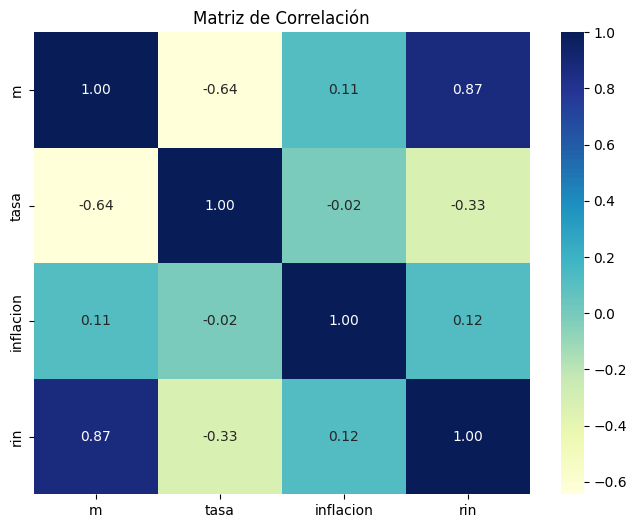

In [ ]:
## B) MATRIZ DE CORRELACION
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Matriz de Correlaci√≥n")
plt.show()

In [8]:
## C) TRANSFORMAR LOS DATOS A LN
df["ln_m"] = np.log(df["m"])
df["ln_tasa"] = np.log(df["tasa"])
df["ln_inflacion"] = np.log(df["inflacion"].abs())
df["ln_rin"] = np.log(df["rin"])

df = df.drop(columns=["m", "tasa", "inflacion", "rin"])
print(df.head())

  tiempo       ln_m   ln_tasa  ln_inflacion     ln_rin
0  Ene10  11.627382  1.791742     -2.927031  10.444124
1  Feb10  11.642777  1.792054     -5.976141  10.463389
2  Mar10  11.653491  1.795852     -1.312594  10.470760
3  Abr10  11.654769  1.794156     -2.329236  10.464502
4  May10  11.671847  1.800243     -1.755412  10.451898


In [16]:
## C) ANALISIS DESCRIPTIVO
print(df.dtypes)
print("------------------------------")
print(df.isnull().sum())
print("------------------------------")
print(df.describe(include='all'))

tiempo           object
ln_m            float64
ln_tasa         float64
ln_inflacion    float64
ln_rin          float64
dtype: object
------------------------------
tiempo          0
ln_m            0
ln_tasa         0
ln_inflacion    0
ln_rin          0
dtype: int64
------------------------------
       tiempo        ln_m     ln_tasa  ln_inflacion      ln_rin
count     187  187.000000  187.000000    187.000000  187.000000
unique    187         NaN         NaN           NaN         NaN
top     Ene10         NaN         NaN           NaN         NaN
freq        1         NaN         NaN           NaN         NaN
mean      NaN   12.521706    1.970951     -2.007623   11.060993
std       NaN    0.437007    0.466296      1.228371    0.189367
min       NaN   11.627382    1.386616     -7.354387   10.444124
25%       NaN   12.210250    1.614592     -2.563102   11.012314
50%       NaN   12.506149    1.792490     -1.870583   11.077965
75%       NaN   12.988345    2.400601     -1.229748   11.2020

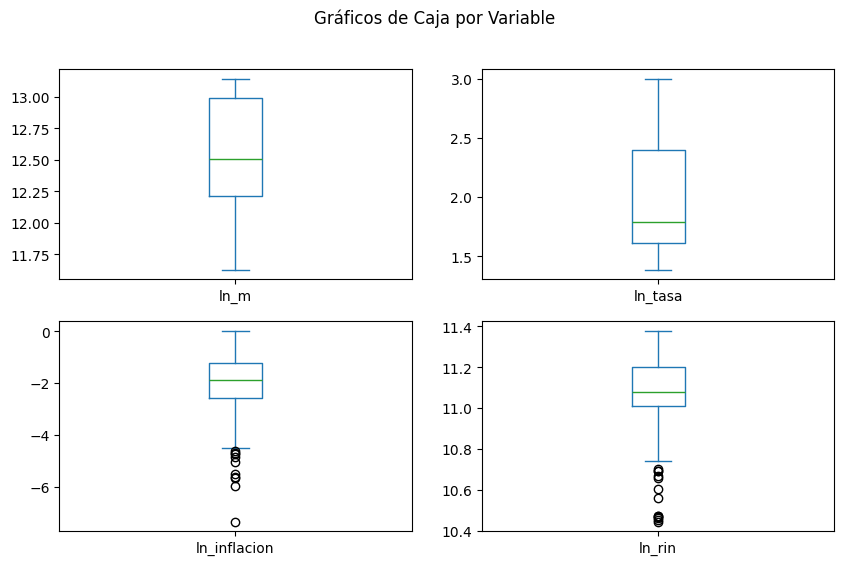

In [17]:
## D) GRAFICO DE CAJA
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,6), sharex=False, sharey=False)
plt.suptitle("Gr√°ficos de Caja por Variable")
plt.show()

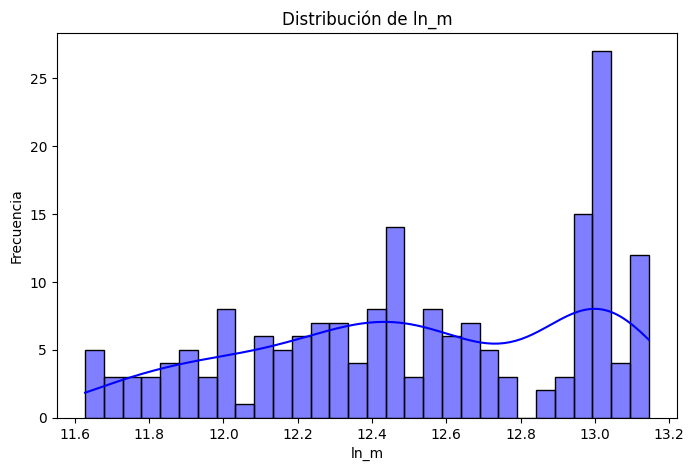

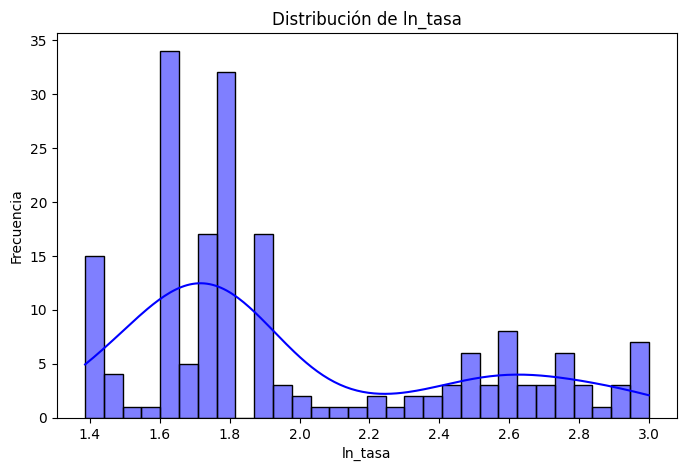

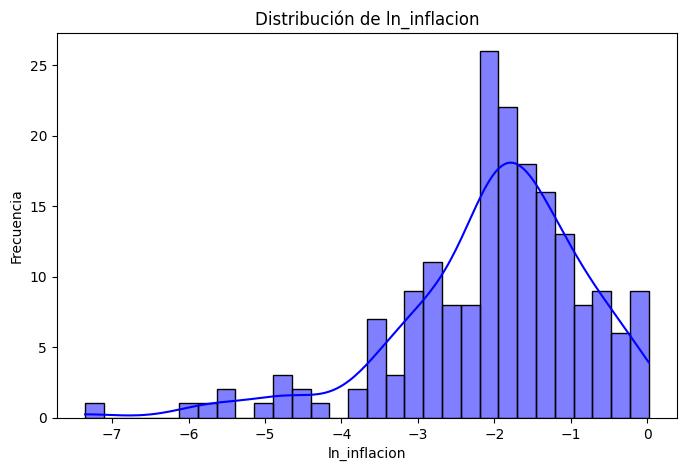

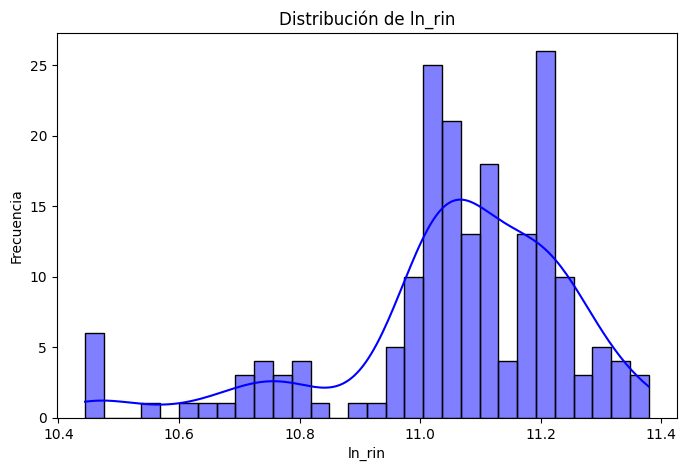

In [11]:
## Distribucion de las variables
for col in df.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], kde=True, bins=30, color="blue")
    plt.title(f"Distribuci√≥n de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

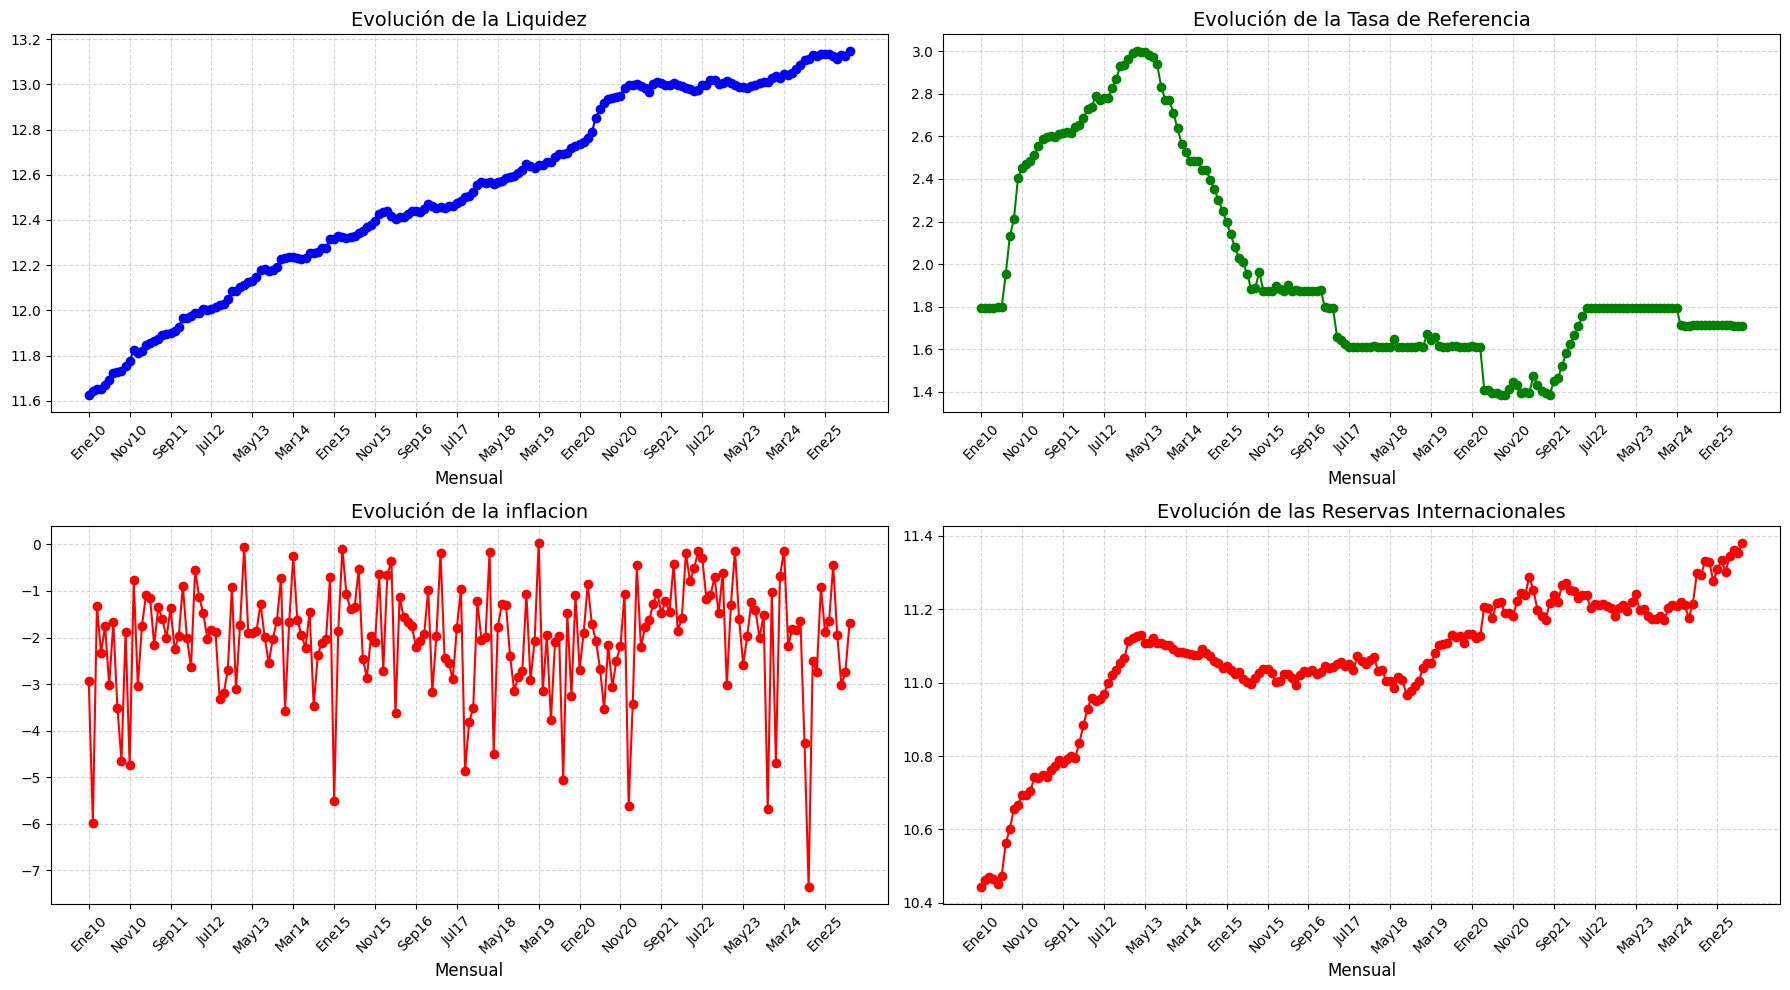

In [21]:
## E) ANALISIS DE LA SERIES EN EL TIEMPO

fig, axes = plt.subplots(2, 2, figsize=(18,10))

# Gr√°fico 1: Liquidez
axes[0,0].plot(df["tiempo"], df["ln_m"], marker="o", linestyle="-", color="blue")
axes[0,0].set_title("Evoluci√≥n de la Liquidez", fontsize=14)
axes[0,0].set_xlabel("Mensual", fontsize=12)
axes[0,0].set_ylabel("", fontsize=12)
axes[0,0].grid(True, linestyle="--", alpha=0.5)
axes[0,0].set_xticks(df["tiempo"][::10])
axes[0,0].tick_params(axis='x', rotation=45)

# Gr√°fico 2: Tasa
axes[0,1].plot(df["tiempo"], df["ln_tasa"], marker="o", linestyle="-", color="green")
axes[0,1].set_title("Evoluci√≥n de la Tasa de Referencia", fontsize=14)
axes[0,1].set_xlabel("Mensual", fontsize=12)
axes[0,1].set_ylabel("", fontsize=12)
axes[0,1].grid(True, linestyle="--", alpha=0.5)
axes[0,1].set_xticks(df["tiempo"][::10])
axes[0,1].tick_params(axis='x', rotation=45)

# Gr√°fico 3: IPC
axes[1,0].plot(df["tiempo"], df["ln_inflacion"], marker="o", linestyle="-", color="red")
axes[1,0].set_title("Evoluci√≥n de la inflacion", fontsize=14)
axes[1,0].set_xlabel("Mensual", fontsize=12)
axes[1,0].set_ylabel("", fontsize=12)
axes[1,0].grid(True, linestyle="--", alpha=0.5)
axes[1,0].set_xticks(df["tiempo"][::10])
axes[1,0].tick_params(axis='x', rotation=45)

# Gr√°fico 4: RIN
axes[1,1].plot(df["tiempo"], df["ln_rin"], marker="o", linestyle="-", color="red")
axes[1,1].set_title("Evoluci√≥n de las Reservas Internacionales", fontsize=14)
axes[1,1].set_xlabel("Mensual", fontsize=12)
axes[1,1].set_ylabel("", fontsize=12)
axes[1,1].grid(True, linestyle="--", alpha=0.5)
axes[1,1].set_xticks(df["tiempo"][::10])
axes[1,1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

# 5. Estimaci√≥n del modelo

In [26]:
# Definir variables independientes y dependiente
X = df[["ln_tasa", "ln_inflacion", "ln_rin"]]
y = df["ln_m"]

# Agregar constante para el intercepto
X = sm.add_constant(X)

# Crear modelo y ajustar
modelo = sm.OLS(y, X).fit()

# Resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   ln_m   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     1012.
Date:                Mon, 08 Sep 2025   Prob (F-statistic):          1.25e-113
Time:                        14:24:52   Log-Likelihood:                 158.02
No. Observations:                 187   AIC:                            -308.0
Df Residuals:                     183   BIC:                            -295.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -4.6623      0.502     -9.283   



* üìâ Tasa de referencia ‚Üë ‚Üí Liquidez ‚Üì (efecto contractivo, muy fuerte y significativo).

* üìà Inflaci√≥n ‚Üë ‚Üí Liquidez ‚Üë (efecto d√©bil, poco significativo).

* üìà RIN ‚Üë ‚Üí Liquidez ‚Üë (efecto expansivo, fuerte y significativo).

# 6. Diagn√≥sticos econom√©tricos

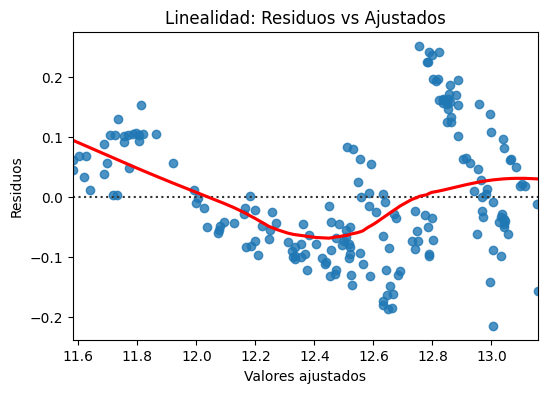

In [27]:
# 1. Linealidad (gr√°fico residuos vs valores ajustados)
plt.figure(figsize=(6,4))
sns.residplot(x=modelo.fittedvalues, y=modelo.resid, lowess=True, line_kws={"color":"red"})
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Linealidad: Residuos vs Ajustados")
plt.show()


Test Shapiro-Wilk:
Estad√≠stico: 0.966139319951342  | p-value: 0.0001717707984245896
‚ùå No normalidad (se rechaza H0)


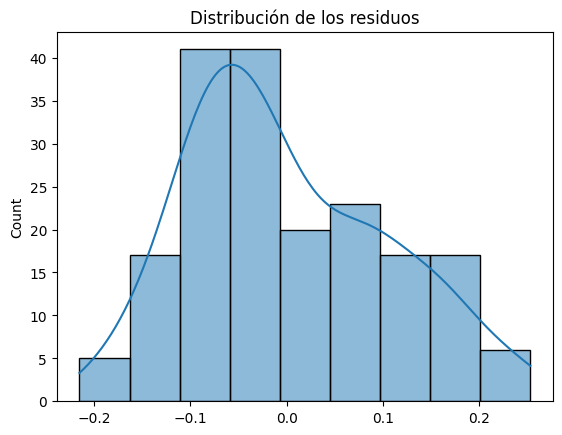

In [28]:
# 2. Normalidad de errores
# Shapiro-Wilk
stat_shapiro, p_shapiro = shapiro(modelo.resid)
print("\nTest Shapiro-Wilk:")
print("Estad√≠stico:", stat_shapiro, " | p-value:", p_shapiro)
if p_shapiro > 0.05:
    print("‚úÖ Normalidad (no se rechaza H0)")
else:
    print("‚ùå No normalidad (se rechaza H0)")

sns.histplot(modelo.resid, kde=True)
plt.title("Distribuci√≥n de los residuos")
plt.show()

In [29]:
# 3. Homocedasticidad (Breusch-Pagan): Los errores tienen la misma varianza en todas las observaciones
bp_test = het_breuschpagan(modelo.resid, modelo.model.exog)
labels = ["LM Statistic","LM-Test p-value","F-Statistic","F-Test p-value"]
results = dict(zip(labels, bp_test))

print("\nTest de Breusch-Pagan (Homocedasticidad):")
print(results)

if results["LM-Test p-value"] > 0.05:
    print("‚úÖ Se cumple homocedasticidad (no se rechaza H0).")
else:
    print("‚ùå No se cumple homocedasticidad (se rechaza H0).")


Test de Breusch-Pagan (Homocedasticidad):
{'LM Statistic': np.float64(9.914709513153886), 'LM-Test p-value': np.float64(0.01930522406285589), 'F-Statistic': np.float64(3.415288071864506), 'F-Test p-value': np.float64(0.018597030288089438)}
‚ùå No se cumple homocedasticidad (se rechaza H0).



Prueba Durbin-Watson:
Estad√≠stico DW: 0.1433
Posible autocorrelaci√≥n positiva de los residuos.


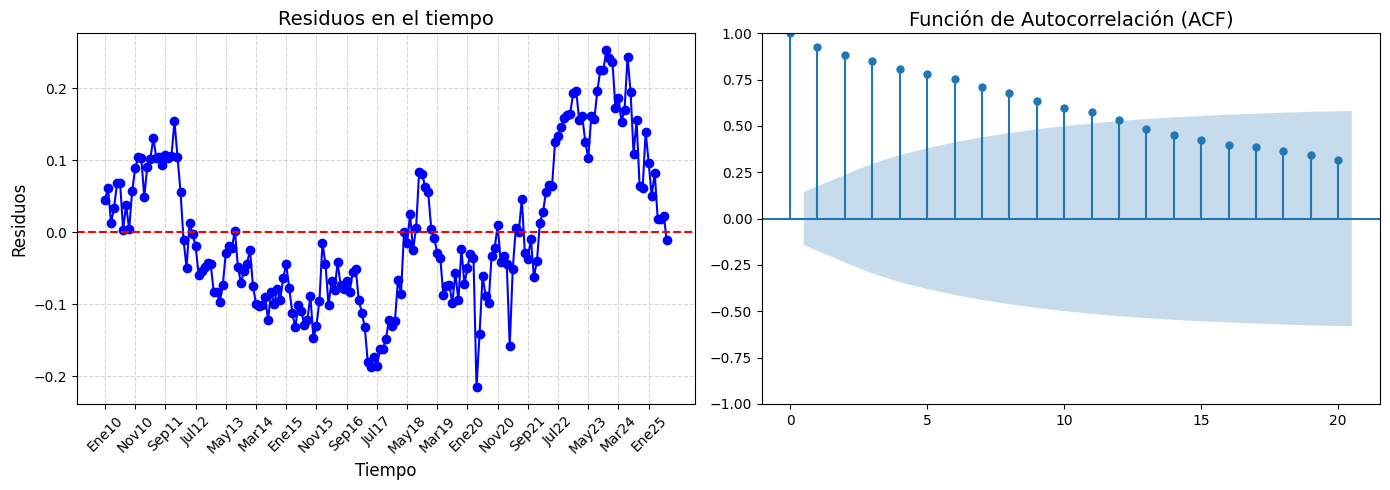

In [30]:
# 4. Durbin-Watson
dw_stat = durbin_watson(modelo.resid)

print("\nPrueba Durbin-Watson:")
print("Estad√≠stico DW:", round(dw_stat, 4))

# Interpretaci√≥n
if dw_stat < 1.5:
    print("Posible autocorrelaci√≥n positiva de los residuos.")
elif dw_stat > 2.5:
    print("Posible autocorrelaci√≥n negativa de los residuos.")
else:
    print("No hay evidencia fuerte de autocorrelaci√≥n.")

# Crear figura con 2 gr√°ficos
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ===============================
# Gr√°fico 1: Residuos en el tiempo
axes[0].plot(df["tiempo"], modelo.resid, marker="o", linestyle="-", color="blue")
axes[0].axhline(y=0, color="red", linestyle="--")
axes[0].set_title("Residuos en el tiempo", fontsize=14)
axes[0].set_xlabel("Tiempo", fontsize=12)
axes[0].set_ylabel("Residuos", fontsize=12)
axes[0].grid(True, linestyle="--", alpha=0.5)


axes[0].set_xticks(df["tiempo"][::10])
axes[0].tick_params(axis='x', rotation=45)

# ===============================
# Gr√°fico 2: Autocorrelaci√≥n (ACF)
sm.graphics.tsa.plot_acf(modelo.resid, lags=20, ax=axes[1])
axes[1].set_title("Funci√≥n de Autocorrelaci√≥n (ACF)", fontsize=14)

plt.tight_layout()
plt.show()

# 7. Interpretaci√≥n econ√≥mica

Constante (-4.6623, p=0.000): sin interpretaci√≥n econ√≥mica directa, solo ajusta el modelo.

* Tasa de referencia (Œ≤ = -0.4286, p=0.000): Efecto negativo y significativo.

‚Üë 1% tasa ‚Üí ‚Üì 0.43% liquidez.

El BCRP restringe el dinero circulante al elevar la tasa.

* Inflaci√≥n (Œ≤ = 0.0105, p=0.100): Efecto positivo pero d√©bil (no significativo al 5%).

‚Üë inflaci√≥n ‚Üí ligera ‚Üë en liquidez, pero sin robustez estad√≠stica.

* RIN (Œ≤ = 1.6318, p=0.000): Efecto positivo y fuerte.

‚Üë 1% RIN ‚Üí ‚Üë 1.63% liquidez.

Mayores reservas fortalecen la capacidad de expansi√≥n monetaria.